# Spatio-temporal analysis

In [ ]:
import datetime

import pylandstats as pls

We are often interested in the analysis of the temporal evolution of the configuration and composition of a particular landscape. To that end, we will use the three extracts of [Veveyse district](https://en.wikipedia.org/wiki/Veveyse_District) from the [Swiss Land Statistics (SLS) datasets from the Swiss Federal Statistical Office](https://www.bfs.admin.ch/bfs/en/home/services/geostat/swiss-federal-statistics-geodata/land-use-cover-suitability/swiss-land-use-statistics.html) for the years 1980, 1992, 2004 and 2013.

We first need to run the cell below so that the land use/land cover (LULC) data is downloaded and preprocessed (see [A03-swisslandstats-preprocessing.ipynb](https://github.com/martibosch/pylandstats-notebooks/blob/master/notebooks/A03-swisslandstats-preprocessing.ipynb) for more details).

In [ ]:
!snakemake -c1 -d .. -s ../Snakefile veveyse_lulc_tifs

Building DAG of jobs...
Nothing to be done (all requested files are present and up to date).
Complete log: .snakemake/log/2024-07-25T193737.646312.snakemake.log


We can now use the class `SpatioTemporalAnalysis`, which we can instantiate with a temporally-ordered sequence of landscape snapshots.

In [ ]:
URBAN_CLASS_VAL = 1
input_filepaths = [
    "../data/processed/veveyse/LU85_4.tif",
    "../data/processed/veveyse/LU97_4.tif",
    "../data/processed/veveyse/LU09_4.tif",
    "../data/processed/veveyse/LU18_4.tif",
]
years = ["1980", "1992", "2004", "2013"]

sta = pls.SpatioTemporalAnalysis(input_filepaths, dates=years)

[########################################] | 100% Completed | 1.38 ss


## Spatio-temporal data frames

By now, `SpatioTemporalAnalysis` only supports class and landscape-level metrics, which can be computed by means of its methods `compute_class_metrics_df` and `compute_landscape_metrics_df` respectively. For instance, a data frame of the class-level metrics can be obtained as follows:

In [ ]:
class_metrics_df = sta.compute_class_metrics_df()
class_metrics_df.head()

[########################################] | 100% Completed | 3.53 ss


total_area  proportion_of_landscape  number_of_patches  \
class_val dates                                                           
1         1980        702.0                 5.225936                304   
          1992        794.0                 5.910817                309   
          2004        906.0                 6.744584                304   
          2013       1041.0                 7.749572                287   
2         1980       8351.0                62.167796                 32   

                 patch_density  largest_patch_index  total_edge  edge_density  \
class_val dates                                                                 
1         1980        2.263083             0.454106    208400.0     15.514033   
          1992        2.300305             0.602993    227800.0     16.958237   
          2004        2.263083             0.699769    242000.0     18.015335   
          2013        2.136529             1.421872    256600.0     19.102211   
2         1980        0.238219            52.170029    615000.0     45.782774   

                 total_core_area  core_area_proportion_of_landscape  \
class_val dates                                                       
1         1980              25.0                           0.186109   
          1992              28.0                           0.208442   
          2004              50.0                           0.372218   
          2013              90.0                           0.669992   
2         1980            4076.0                          30.343185   

                 number_of_disjunct_core_areas  ...  \
class_val dates                                 ...   
1         1980                               9  ...   
          1992                              10  ...   
          2004                              12  ...   
          2013                              20  ...   
2         1980                             107  ...   

                 euclidean_nearest_neighbor_md  euclidean_nearest_neighbor_ra  \
class_val dates                                                                 
1         1980                      223.606798                    1100.000000   
          1992                      223.606798                     940.175425   
          2004                      223.606798                    1100.000000   
          2013                      223.606798                    1100.000000   
2         1980                      200.000000                     470.820393   

                 euclidean_nearest_neighbor_sd  euclidean_nearest_neighbor_cv  \
class_val dates                                                                 
1         1980                      169.300811                      55.094159   
          1992                      156.817097                      52.299458   
          2004                      162.962720                      54.136494   
          2013                      168.551251                      54.504167   
2         1980                       85.842455                      36.252869   

                 disjunct_core_area_mn  disjunct_core_area_am  \
class_val dates                                                 
1         1980                2.777778               5.560000   
          1992                2.800000               8.000000   
          2004                4.166667              10.720000   
          2013                4.500000              20.400000   
2         1980               38.093458             740.707066   

                 disjunct_core_area_md  disjunct_core_area_ra  \
class_val dates                                                 
1         1980                     1.0                    9.0   
          1992                     1.0                   13.0   
          2004                     1.5                   16.0   
          2013                     1.0                   31.0   
2         1980                     3.0                 13

Again, we can use the operations of any pandas data frame. For instance, we can get all the metrics for the *urban* class (`class_val` of 1) in 1992:

In [ ]:
class_metrics_df.loc[(1, "1992")]

total_area                 794.000000
proportion_of_landscape      5.910817
number_of_patches          309.000000
patch_density                2.300305
largest_patch_index          0.602993
                              ...    
disjunct_core_area_am        8.000000
disjunct_core_area_md        1.000000
disjunct_core_area_ra       13.000000
disjunct_core_area_sd        3.815757
disjunct_core_area_cv      136.277029
Name: (1, 1992), Length: 66, dtype: float64

Similarly, the data frame of landscape metrics can be obtained as follows:

In [ ]:
sta.compute_landscape_metrics_df()

[########################################] | 100% Completed | 2.56 ss


,total_area,number_of_patches,patch_density,largest_patch_index,total_edge,edge_density,total_core_area,number_of_disjunct_core_areas,landscape_shape_index,effective_mesh_size,...,euclidean_nearest_neighbor_md,euclidean_nearest_neighbor_ra,euclidean_nearest_neighbor_sd,euclidean_nearest_neighbor_cv,disjunct_core_area_mn,disjunct_core_area_am,disjunct_core_area_md,disjunct_core_area_ra,disjunct_core_area_sd,disjunct_core_area_cv
dates,,,,,,,,,,,,,,,,,,,,,
1980,13433.0,666,4.957939,52.170029,677000.0,50.398273,5667.0,200,16.711207,4074.760143,...,223.606798,3124.154028,216.625926,66.540480,28.335000,533.272195,3.0,1352.0,124.855928,440.642061
1992,13433.0,662,4.928162,48.596739,686000.0,51.068265,5572.0,209,16.905172,3721.028140,...,223.606798,3124.154028,222.286812,67.856637,26.660287,534.324217,3.0,1444.0,121.661679,456.340467
2004,13433.0,652,4.853718,47.829971,691400.0,51.470260,5476.0,219,17.021552,3711.910593,...,223.606798,3124.154028,231.885409,69.562278,25.004566,777.260594,3.0,2049.0,143.674210,574.591890
2013,13433.0,636,4.734609,46.862205,703300.0,52.356138,5373.0,233,17.278017,3593.476141,...,223.606798,3124.154028,236.550901,70.451170,23.060086,509.698816,3.0,1555.0,111.314332,482.714300


### Customizing your spatio-temporal analysis

As within the `Landscape` analysis, we can also choose to compute a subset of metrics by passing them to the `metrics` keyword argument of the `compute_class_metrics_df` and `compute_landscape_metrics_df` methods, as in:

In [ ]:
metrics = ["proportion_of_landscape", "edge_density", "fractal_dimension_am"]
sta.compute_class_metrics_df(metrics=metrics)

[########################################] | 100% Completed | 239.35 ms


proportion_of_landscape  edge_density  fractal_dimension_am
class_val dates                                                             
1         1980                  5.225936     15.514033              1.073800
          1992                  5.910817     16.958237              1.083145
          2004                  6.744584     18.015335              1.089937
          2013                  7.749572     19.102211              1.113777
2         1980                 62.167796     45.782774              1.287254
          1992                 60.932033     46.281545              1.280678
          2004                 59.941934     46.936649              1.281927
          2013                 58.862503     47.606640              1.284123
3         1980                 29.531750     32.643490              1.206868
          1992                 30.313407     32.717933              1.218381
          2004                 30.611181     32.330827              1.225019
          2013                 30.715402     32.353160              1.224259
4         1980                  3.074518      6.856250              1.064272
          1992                  2.843743      6.178813              1.061158
          2004                  2.702300      5.657709              1.055708
          2013                  2.672523      5.650264              1.058115

At the class-level, we can choose to compute the metrics only for a subset of classes through the `classes` argument. We can simoultaneously choose a subset of metrics as well as a subset of classes by specifying both the `metrics` and `classes` arguments. For instance, we can choose to only compute the above metrics and only for the *urban* class (value of 1):

In [ ]:
sta.compute_class_metrics_df(metrics=metrics, classes=[URBAN_CLASS_VAL])

[########################################] | 100% Completed | 104.03 ms


proportion_of_landscape  edge_density  fractal_dimension_am
class_val dates                                                             
1         1980                  5.225936     15.514033              1.073800
          1992                  5.910817     16.958237              1.083145
          2004                  6.744584     18.015335              1.089937
          2013                  7.749572     19.102211              1.113777

In both the `compute_class_metrics_df` and `compute_landscape_metrics_df` methods, we can also customize how some metrics are computed through the `metrics_kwargs` argument:

In [ ]:
metrics_kwargs = {
    "proportion_of_landscape": {"percent": False},
    "edge_density": {"count_boundary": True},
}
sta.compute_class_metrics_df(
    metrics=metrics, classes=[URBAN_CLASS_VAL], metrics_kwargs=metrics_kwargs
)

[########################################] | 100% Completed | 106.07 ms


proportion_of_landscape  edge_density  fractal_dimension_am
class_val dates                                                             
1         1980                  0.052259     15.692697              1.073800
          1992                  0.059108     17.151790              1.083145
          2004                  0.067446     18.223777              1.089937
          2013                  0.077496     19.325542              1.113777

On the other hand, the `dates` keyword argument might also be provided as string or `datetime` objects, e.g.:

In [ ]:
dates = [datetime.date(int(year), 1, 1) for year in years]
sta = pls.SpatioTemporalAnalysis(input_filepaths, dates=dates)
sta.compute_landscape_metrics_df()

[########################################] | 100% Completed | 1.09 sms


,total_area,number_of_patches,patch_density,largest_patch_index,total_edge,edge_density,total_core_area,number_of_disjunct_core_areas,landscape_shape_index,effective_mesh_size,...,euclidean_nearest_neighbor_md,euclidean_nearest_neighbor_ra,euclidean_nearest_neighbor_sd,euclidean_nearest_neighbor_cv,disjunct_core_area_mn,disjunct_core_area_am,disjunct_core_area_md,disjunct_core_area_ra,disjunct_core_area_sd,disjunct_core_area_cv
dates,,,,,,,,,,,,,,,,,,,,,
1980-01-01,13433.0,666,4.957939,52.170029,677000.0,50.398273,5667.0,200,16.711207,4074.760143,...,223.606798,3124.154028,216.625926,66.540480,28.335000,533.272195,3.0,1352.0,124.855928,440.642061
1992-01-01,13433.0,662,4.928162,48.596739,686000.0,51.068265,5572.0,209,16.905172,3721.028140,...,223.606798,3124.154028,222.286812,67.856637,26.660287,534.324217,3.0,1444.0,121.661679,456.340467
2004-01-01,13433.0,652,4.853718,47.829971,691400.0,51.470260,5476.0,219,17.021552,3711.910593,...,223.606798,3124.154028,231.885409,69.562278,25.004566,777.260594,3.0,2049.0,143.674210,574.591890
2013-01-01,13433.0,636,4.734609,46.862205,703300.0,52.356138,5373.0,233,17.278017,3593.476141,...,223.606798,3124.154028,236.550901,70.451170,23.060086,509.698816,3.0,1555.0,111.314332,482.714300


## Plots

One of the most important features of `SpatioTemporalAnalysis` is to plot the evolution of the metrics. We can plot the proportion o landscape occupied by the *urban* class (`class_val` of 1) as in:

[########################################] | 100% Completed | 101.09 ms


<Axes: ylabel='PLAND'>

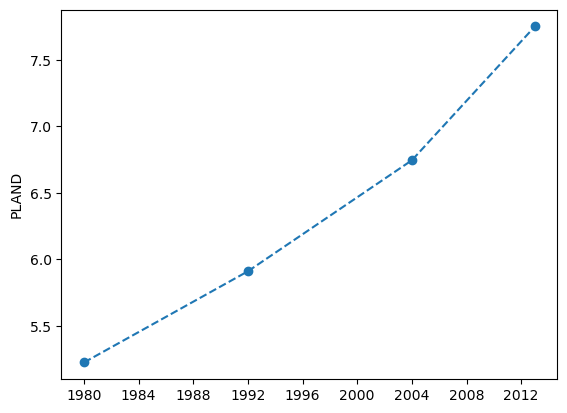

In [ ]:
sta.plot_metric("proportion_of_landscape", class_val=URBAN_CLASS_VAL)

If we want to plot the evolution of a metric at the landscape level, we can do so by using the same `plot_metric` method, but without setting the `class_val` argument. Note however that we cannot compute the `proportion_of_landscape` at the landscape level (we could but it makes no sense, the landscape always occupies 100% of the landscape). Similarly, some metrics such as `shannon_diversity_index` cannot be computed at the class level but only at the landscape level. See the documentation of each metric for more details.

Let's then plot the area-weighted fractal dimension, that is `fractal_dimension_am`, at both the class and landscape level:

[########################################] | 100% Completed | 101.64 ms
[########################################] | 100% Completed | 101.72 ms


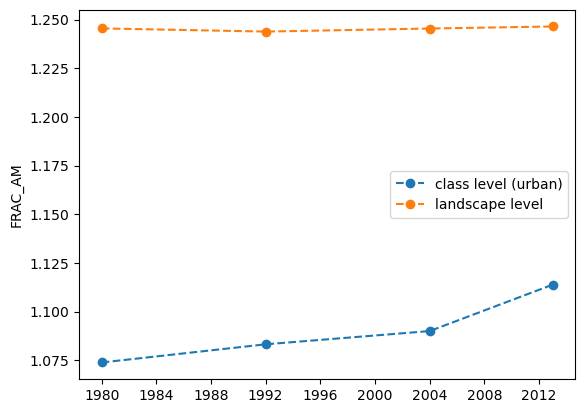

In [ ]:
ax = sta.plot_metric(
    "fractal_dimension_am",
    class_val=URBAN_CLASS_VAL,
    plot_kwargs={"label": "class level (urban)"},
)
_ = sta.plot_metric(
    "fractal_dimension_am", ax=ax, plot_kwargs={"label": "landscape level"}
)
ax.legend()

Note that we can pass keyword arguments to matplotlib's `plot` method through the `plt_kws` argument of `plot_metric`. See the documentation of  [SpatioTemporalAnalysis.plot_metric](https://pylandstats.readthedocs.io/en/latest/spatiotemporal.html#pylandstats.SpatioTemporalAnalysis.plot_metric) for more details.

## See also

* [SpatioTemporalZonalAnalysis](https://github.com/martibosch/pylandstats-notebooks/blob/main/notebooks/04-spatiotemporal-zonal-analysis.ipynb)